In [2]:
import pickle
import os
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pkuseg


In [2]:
with open('../holes_github_dict.pkl','rb') as f:
    holes = pickle.load(f)

In [3]:
with open('../pids_github.pkl','rb') as f:
    pos_pids = pickle.load(f)
with open('../deleted_pids.pkl','rb') as f:
    neg_pids = pickle.load(f)
    
pos_pids = list(set(pos_pids) - set(neg_pids))
print(len(pos_pids), len(neg_pids))

857186 10796


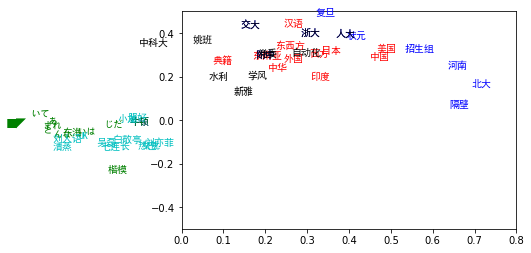

In [3]:

import word2vec
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)
model = word2vec.load('corpusWord2Vec.bin')
rawWordVec = model.vectors

# reduce the dimension of word vector
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

# show some word(center word) and it's similar words
index1,metrics1 = model.similar(u'中国')
index2,metrics2 = model.similar(u'清华')
index3,metrics3 = model.similar(u'牛顿')
index4,metrics4 = model.similar(u'自动化')
index5,metrics5 = model.similar(u'刘亦菲')

# add the index of center word 
index01=np.where(model.vocab==u'中国')
index02=np.where(model.vocab==u'清华')
index03=np.where(model.vocab==u'牛顿')
index04=np.where(model.vocab==u'自动化')
index05=np.where(model.vocab==u'刘亦菲')

index1=np.append(index1,index01)
index2=np.append(index2,index03)
index3=np.append(index3,index03)
index4=np.append(index4,index04)
index5=np.append(index5,index05)

fig = plt.figure()
ax = fig.add_subplot(111)

for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties='SimHei',color='r')

for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties='SimHei',color='b')

for i in index3:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties='SimHei',color='g')

for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties='SimHei',color='k')

for i in index5:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties='SimHei',color='c')

ax.axis([0,0.8,-0.5,0.5])
plt.show()


In [5]:

import word2vec
model = word2vec.load('corpusWord2Vec.bin')
a='保研'
print(model[a][:10])


/home1/czb/anaconda3/envs/torchsparse/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[ 0.04781811 -0.04908484 -0.00073652 -0.01611761 -0.08490036 -0.05371191
 -0.01265323 -0.0452581  -0.08618768 -0.0927384 ]


In [14]:
from utils import split_train, hole_dzdataset
from sklearn.model_selection import train_test_split

train_pos_pids, test_pos_pids = split_train(np.array(pos_pids), 0.2)
train_neg_pids, test_neg_pids = split_train(np.array(neg_pids), 0.2)
# Duplicate the negative data
train_neg_pids = np.array(list(train_neg_pids) * 30)
test_neg_pids = np.array(list(test_neg_pids) * 30)


In [15]:
#torch.save((train_dataset, test_dataset), 'datasets')


In [16]:

import utils
from utils import split_train, hole_dzdataset, sen_parse
from sklearn.model_selection import train_test_split

seg = pkuseg.pkuseg(model_name='web')
a=" "
fileTrainRead = [a.join(sen_parse(holes[d]['dz_text'], seg))+"\n" for d in train_pos_pids]
with open("train_pos1117",'w',encoding='utf-8') as fW:
    fW.writelines(fileTrainRead)
fileTrainRead = [a.join(sen_parse(holes[d]['dz_text'], seg))+"\n" for d in test_pos_pids]
with open("test_pos1117",'w',encoding='utf-8') as fW:
    fW.writelines(fileTrainRead)
fileTrainRead = [a.join(sen_parse(holes[d]['dz_text'], seg))+"\n" for d in train_neg_pids]
with open("train_neg1117",'w',encoding='utf-8') as fW:
    fW.writelines(fileTrainRead)
fileTrainRead = [a.join(sen_parse(holes[d]['dz_text'], seg))+"\n" for d in test_neg_pids]
with open("test_neg1117",'w',encoding='utf-8') as fW:
    fW.writelines(fileTrainRead)


In [17]:
import utils
#reload(utils)
from utils import split_train, hole_dzdataset, sen_parse, collate_fn
from imp import reload


with open("train_pos1117",'r',encoding='utf-8') as fW:
    train_pos = [s.split() for s in fW.readlines()]
with open("test_pos1117",'r',encoding='utf-8') as fW:
    test_pos = [s.split() for s in fW.readlines()]
with open("train_neg1117",'r',encoding='utf-8') as fW:
    train_neg = [s.split() for s in fW.readlines()]
with open("test_neg1117",'r',encoding='utf-8') as fW:
    test_neg = [s.split() for s in fW.readlines()]

seg = pkuseg.pkuseg(model_name='web')
train_dataset = hole_dzdataset(train_pos, train_neg, 16, model)
test_dataset = hole_dzdataset(test_pos, test_neg, 16, model)

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = 32,
                              shuffle = True,
                              num_workers = 0,
                              pin_memory = True,
                              drop_last = True,
                              collate_fn=collate_fn)



A
A


In [18]:
test_dataloader = DataLoader(dataset = test_dataset,
                              batch_size = 32,
                              shuffle = True,
                              num_workers = 0,
                              pin_memory = True,
                              drop_last = True,
                              collate_fn=collate_fn)
torch.save((train_dataset,test_dataset,train_dataloader,test_dataloader), "../data_and_loaders1117")

In [19]:
from imp import reload
import utils
reload(utils)
import time
from utils import lstm_model, test_eval
train_dataset,test_dataset,train_dataloader,test_dataloader = torch.load("../data_and_loaders1117")
train_dataloader.num_workers = 0
test_dataloader.num_workers = 0
the_lstm = lstm_model(300, 32)
the_lstm = the_lstm.cuda()
optimizer = torch.optim.SGD(the_lstm.parameters(), lr = 0.01, momentum = 0.9)
loss_fn = torch.nn.MSELoss()
print("start train")

since = time.time()
for epoch in range(100):
    the_lstm.train()
    for i,(x,lens,y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        y_predict = the_lstm(x, lens)
        loss = loss_fn(y_predict, y.cuda())
        loss.backward()
        optimizer.step()
    print("epoch:", epoch, test_eval(test_dataloader, the_lstm), "time:", time.time()-since)
    since = time.time()

start train


/home1/czb/anaconda3/envs/torchsparse/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch: 0 0.8245876236282347 time: 434.05469369888306
epoch: 1 0.8310442351984826 time: 453.8799707889557
epoch: 2 0.8319672131147541 time: 447.0666227340698
epoch: 3 0.8342196179379487 time: 434.70455050468445
epoch: 4 0.8363153705459965 time: 443.84785652160645
epoch: 5 0.8403205866413765 time: 441.67692732810974
epoch: 6 0.8360782753014496 time: 439.6658203601837
epoch: 7 0.828499695163257 time: 443.00411915779114
epoch: 8 0.834575260804769 time: 440.664085149765
epoch: 9 0.8357692047148083 time: 431.9085295200348
epoch: 10 0.8360401707085761 time: 444.1946725845337
epoch: 11 0.8375389513616042 time: 438.59401202201843
epoch: 12 0.8350409836065574 time: 444.54671335220337
epoch: 13 0.8360147676466604 time: 430.201105594635
epoch: 14 0.8391393442622951 time: 454.4165759086609
epoch: 15 0.8417262227340468 time: 444.1811375617981
epoch: 16 0.839677042406178 time: 433.80976152420044
epoch: 17 0.8374458068012465 time: 426.87681007385254
epoch: 18 0.8312008874136296 time: 432.7294046878814

In [20]:
#reload(utils)
#from utils import split_train, hole_dzdataset, sen_parse
#ds = hole_dzdataset([['贵校','隔壁','保研'],['信科','保研','百讲']], [['清华','北大'],['中华','人民','共和国']], 2, model)

In [21]:
torch.save(the_lstm, 'lstm_1117')

/home1/czb/anaconda3/envs/torchsparse/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type lstm_model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home1/czb/anaconda3/envs/torchsparse/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home1/czb/anaconda3/envs/torchsparse/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home1/czb/anaconda3/envs/torchsparse/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked 

In [22]:
the_lstm

lstm_model(
  (rnn): LSTM(300, 300)
  (score): Sequential(
    (0): Linear(in_features=300, out_features=10, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=10, out_features=2, bias=True)
    (3): Softmax(dim=None)
  )
)